In [1]:
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# make pairs
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

In [4]:
pairs_train.shape

(120000, 2, 28, 28)

In [5]:
labels_train.shape

(120000,)

In [6]:
labels_train

array([1, 0, 1, ..., 0, 1, 0])

0


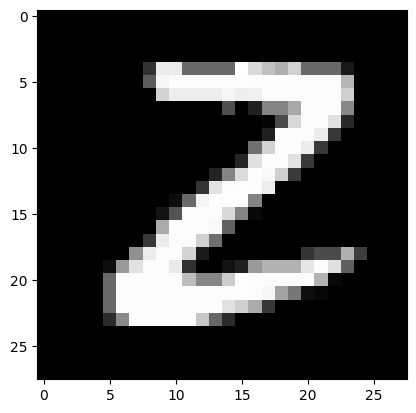

In [12]:
# take a peek at the data
plt.imshow(pairs_train[701,1], cmap="gray")
print(labels_train[701])

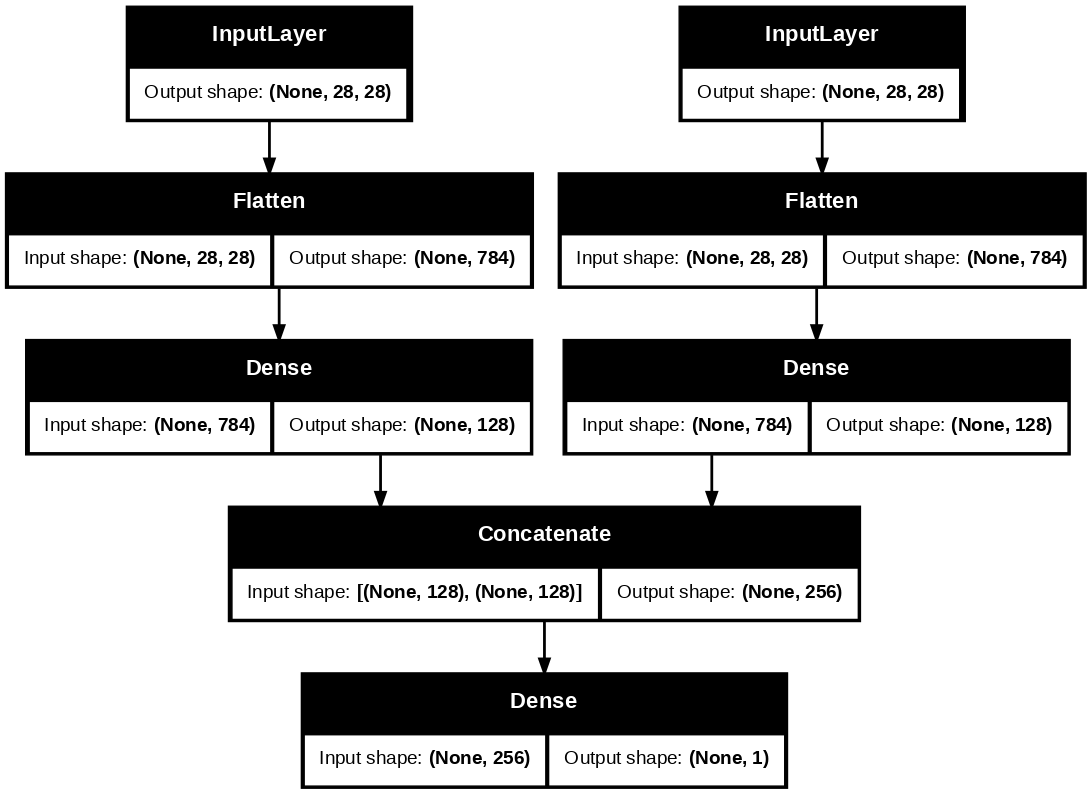

In [21]:
# Weights not shared
inp1 = Input(shape=(28,28))
flatten1 = Flatten()(inp1)
out1= Dense(128, activation='relu')(flatten1)

inp2=  Input(shape=(28,28))
flatten2 = Flatten()(inp2)
out2= Dense(128, activation='relu')(flatten2)

merge_layer = Concatenate()([out1, out2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[inp1, inp2], outputs=dense_layer)

keras.utils.plot_model(model, show_shapes=True, dpi=100)


In [22]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_11            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_12 (Flatten)      │ (None, 784)            │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_13 (Flatten)      │ (None, 784)            │              0 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 128)            │        100,480 │ flatten_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 128)            │        100,480 │ flatten_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 256)            │              0 │ dense_15[0][0],        │
│ (Concatenate)             │                        │                │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 1)              │            257 │ concatenate_5[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 201,217 (786.00 KB)

 Trainable params: 201,217 (786.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10)

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5015 - loss: 0.6984
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5069 - loss: 0.6932
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5107 - loss: 0.6927
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5140 - loss: 0.6925
Epoch 5/10
2415/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5175 - loss: 0.6923

KeyboardInterrupt: 

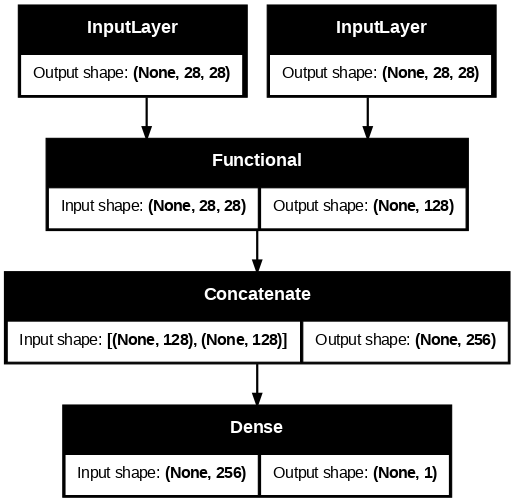

In [26]:
input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Concatenate()([dense1, dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)
keras.utils.plot_model(model, show_shapes=True, dpi=80)

In [27]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_20            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_13             │ (None, 128)            │        100,480 │ input_layer_19[0][0],  │
│ (Functional)              │                        │                │ input_layer_20[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_8             │ (None, 256)            │              0 │ functional_13[0][0],   │
│ (Concatenate)             │                        │                │ functional_13[1][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 1)              │            257 │ concatenate_8[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 100,737 (393.50 KB)

 Trainable params: 100,737 (393.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.4953 - loss: 0.6965
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5010 - loss: 0.6932
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5047 - loss: 0.6930
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5080 - loss: 0.6928
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5026 - loss: 0.6926
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5062 - loss: 0.6924
Epoch 7/10
2509/7500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5151 - loss: 0.6916

KeyboardInterrupt: 

In [33]:
import tensorflow as tf
from keras.layers import Input, Flatten, Dense, Lambda
from keras.models import Model

def euclidean_distance(vects):
    x, y = vects
    sum_square = tf.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, tf.keras.backend.epsilon()))

def euclidean_distance_output_shape(input_shapes):
    shape1, shape2 = input_shapes
    return (shape1[0], 1)

# مدل پایه
input = Input((28, 28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

# ورودی‌ها
input1 = Input((28, 28))
input2 = Input((28, 28))

dense1 = dense(input1)
dense2 = dense(input2)

# لایه Lambda با euclidean_distance
merge_layer = Lambda(euclidean_distance, output_shape=euclidean_distance_output_shape)([dense1, dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)

# کامپایل مدل
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# آموزش مدل
import numpy as np
pairs_train = np.random.rand(100, 2, 28, 28)  # داده‌های ورودی ساختگی
labels_train = np.random.randint(0, 2, size=(100, 1))  # برچسب‌ها

# تبدیل ورودی‌ها به دو آرایه جدا
pairs_train_1 = pairs_train[:, 0]
pairs_train_2 = pairs_train[:, 1]

model.fit([pairs_train_1, pairs_train_2], labels_train, batch_size=16, epochs=10)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 308ms/step - accuracy: 0.4714 - loss: 1.9783
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5389 - loss: 0.8598 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5083 - loss: 0.7193  
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4610 - loss: 0.6813 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5119 - loss: 0.5277  
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5049 - loss: 0.4734  
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5224 - loss: 0.4663 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4885 - loss: 0.4535 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6016 - loss: 0.3878  
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6381 - loss: 0.4441 


In [35]:
model.fit([pairs_train_1, pairs_train_2], labels_train, batch_size=16, epochs=10)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8187 - loss: 0.3974 
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.4105 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3982 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.3522 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8317 - loss: 0.4347 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.4156 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9024 - loss: 0.3527 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8821 - loss: 0.3806 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.3777 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8915 - loss: 0.3731 


In [31]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_26            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_16             │ (None, 128)            │        100,480 │ input_layer_25[0][0],  │
│ (Functional)              │                        │                │ input_layer_26[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 1)              │              0 │ functional_16[0][0],   │
│                           │                        │                │ functional_16[1][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 1)              │              2 │ lambda_1[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 100,482 (392.51 KB)

 Trainable params: 100,482 (392.51 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10


AttributeError: Exception encountered when calling Lambda.call().

[1mmodule 'keras.api.backend' has no attribute 'sum'[0m

Arguments received by Lambda.call():
  • inputs=['tf.Tensor(shape=(16, 128), dtype=float32)', 'tf.Tensor(shape=(16, 128), dtype=float32)']
  • mask=['None', 'None']
  • training=True

source:
    https://raw.githubusercontent.com/lukas/ml-class/master/videos/one-shot/